# Process Discovery over real logs

In [2]:
import pm4py

#Algorithms
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

#Evaluation
#from pm4py.algo.evaluation.simplicity import algorithm as simplicity_algo
#from pm4py.algo.evaluation.replay_fitness import algorithm as fitness_algo
#from pm4py.algo.evaluation.precision import algorithm as precision_algo
#from pm4py.algo.evaluation.generalization import algorithm as generalization_algo
from pm4py.algo.evaluation import algorithm as evaluator_algo

# Visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer

## Loading XES file
##### The dataframe produced in the first step was imported to [Disco Process Mining tool](https://fluxicon.com/disco/) than exported as a XES file

In [3]:
file_path = '../data/bpi-incident-process/incident-process-clean.xes.gz'
event_log = event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/42930 [00:00<?, ?it/s]

## Alpha Algorithm

In [3]:
petri_model, start_marking, end_marking = alpha_miner.apply(event_log)

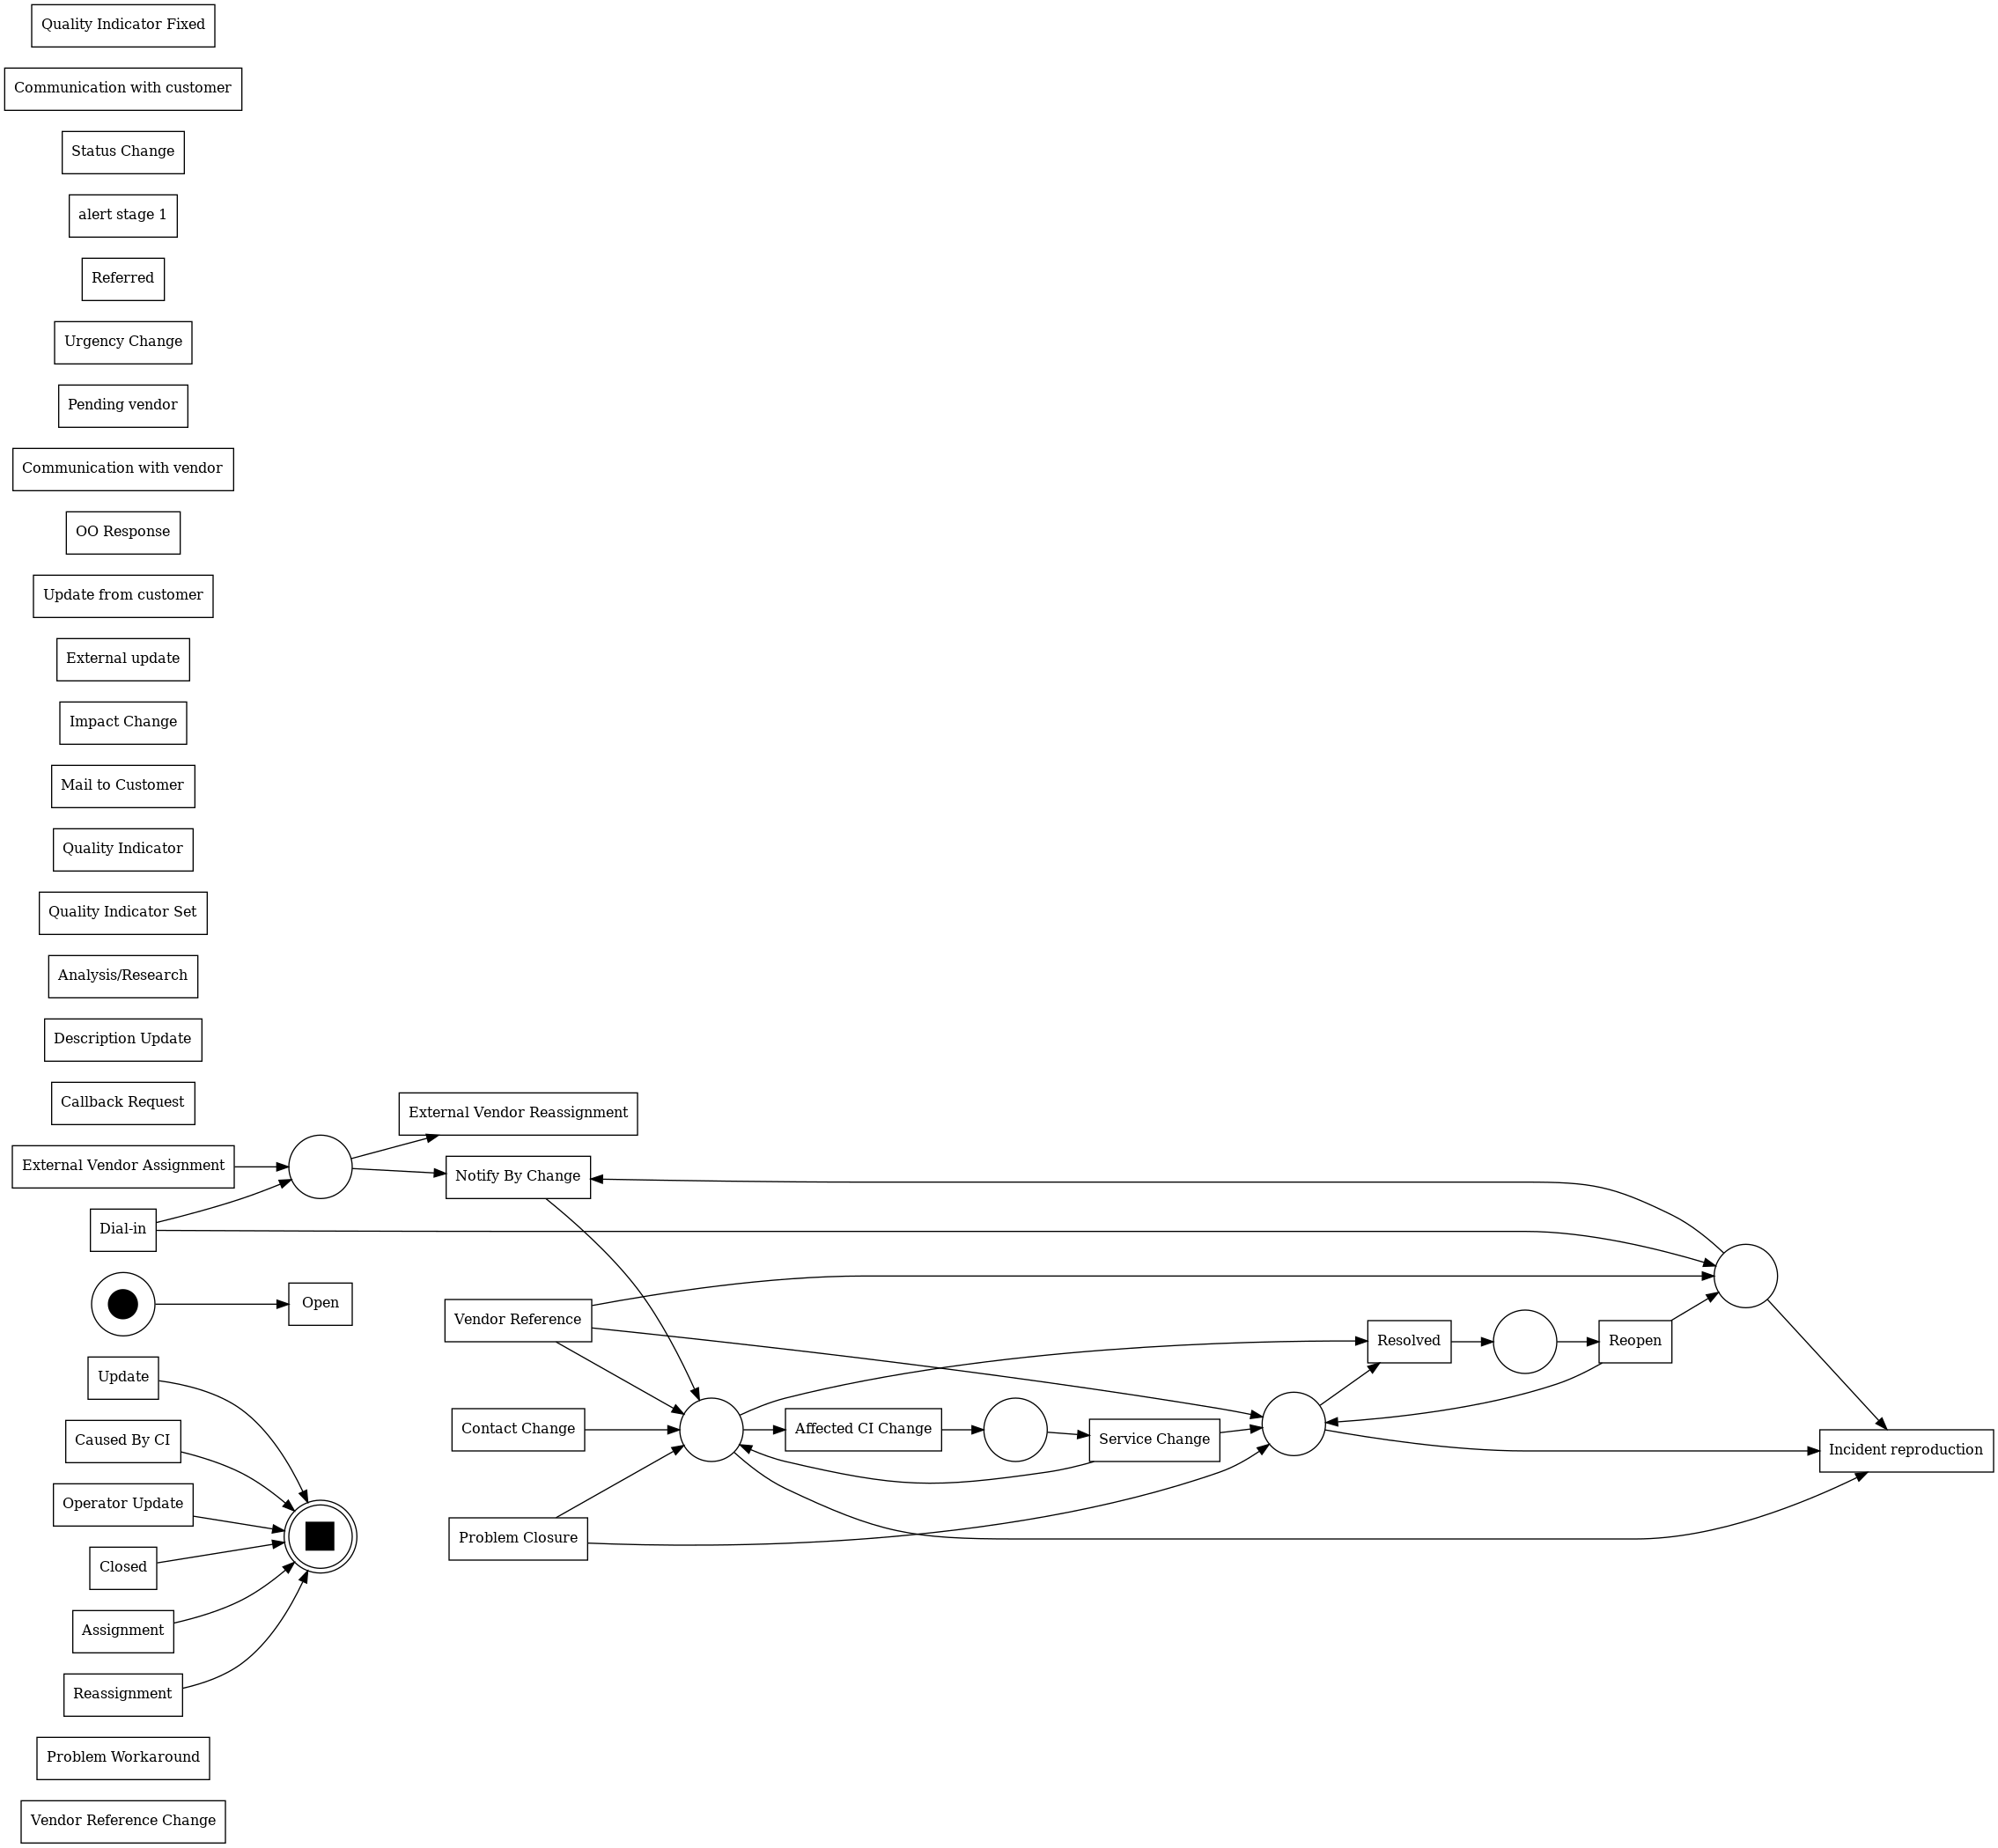

In [4]:
gviz = pn_visualizer.apply(petri_model, start_marking, end_marking)
pn_visualizer.view(gviz)

In [5]:
results = evaluator_algo.apply(event_log, petri_model, start_marking, end_marking)

replaying log with TBR, completed variants ::   0%|          | 0/20939 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/180021 [00:00<?, ?it/s]

In [6]:
results

{'fitness': {'perc_fit_traces': 0.10482180293501048,
  'average_trace_fitness': 0.6702336208617324,
  'log_fitness': 0.5912370708099657,
  'percentage_of_fitting_traces': 0.10482180293501048},
 'precision': 0.28115764920227215,
 'generalization': 0.926321312919646,
 'simplicity': 1.0,
 'metricsAverageWeight': 0.6996790082329709,
 'fscore': 0.3810908551758209}

## Inductive Miner

In [4]:
petri_model, start_marking, end_marking = inductive_miner.apply(event_log)

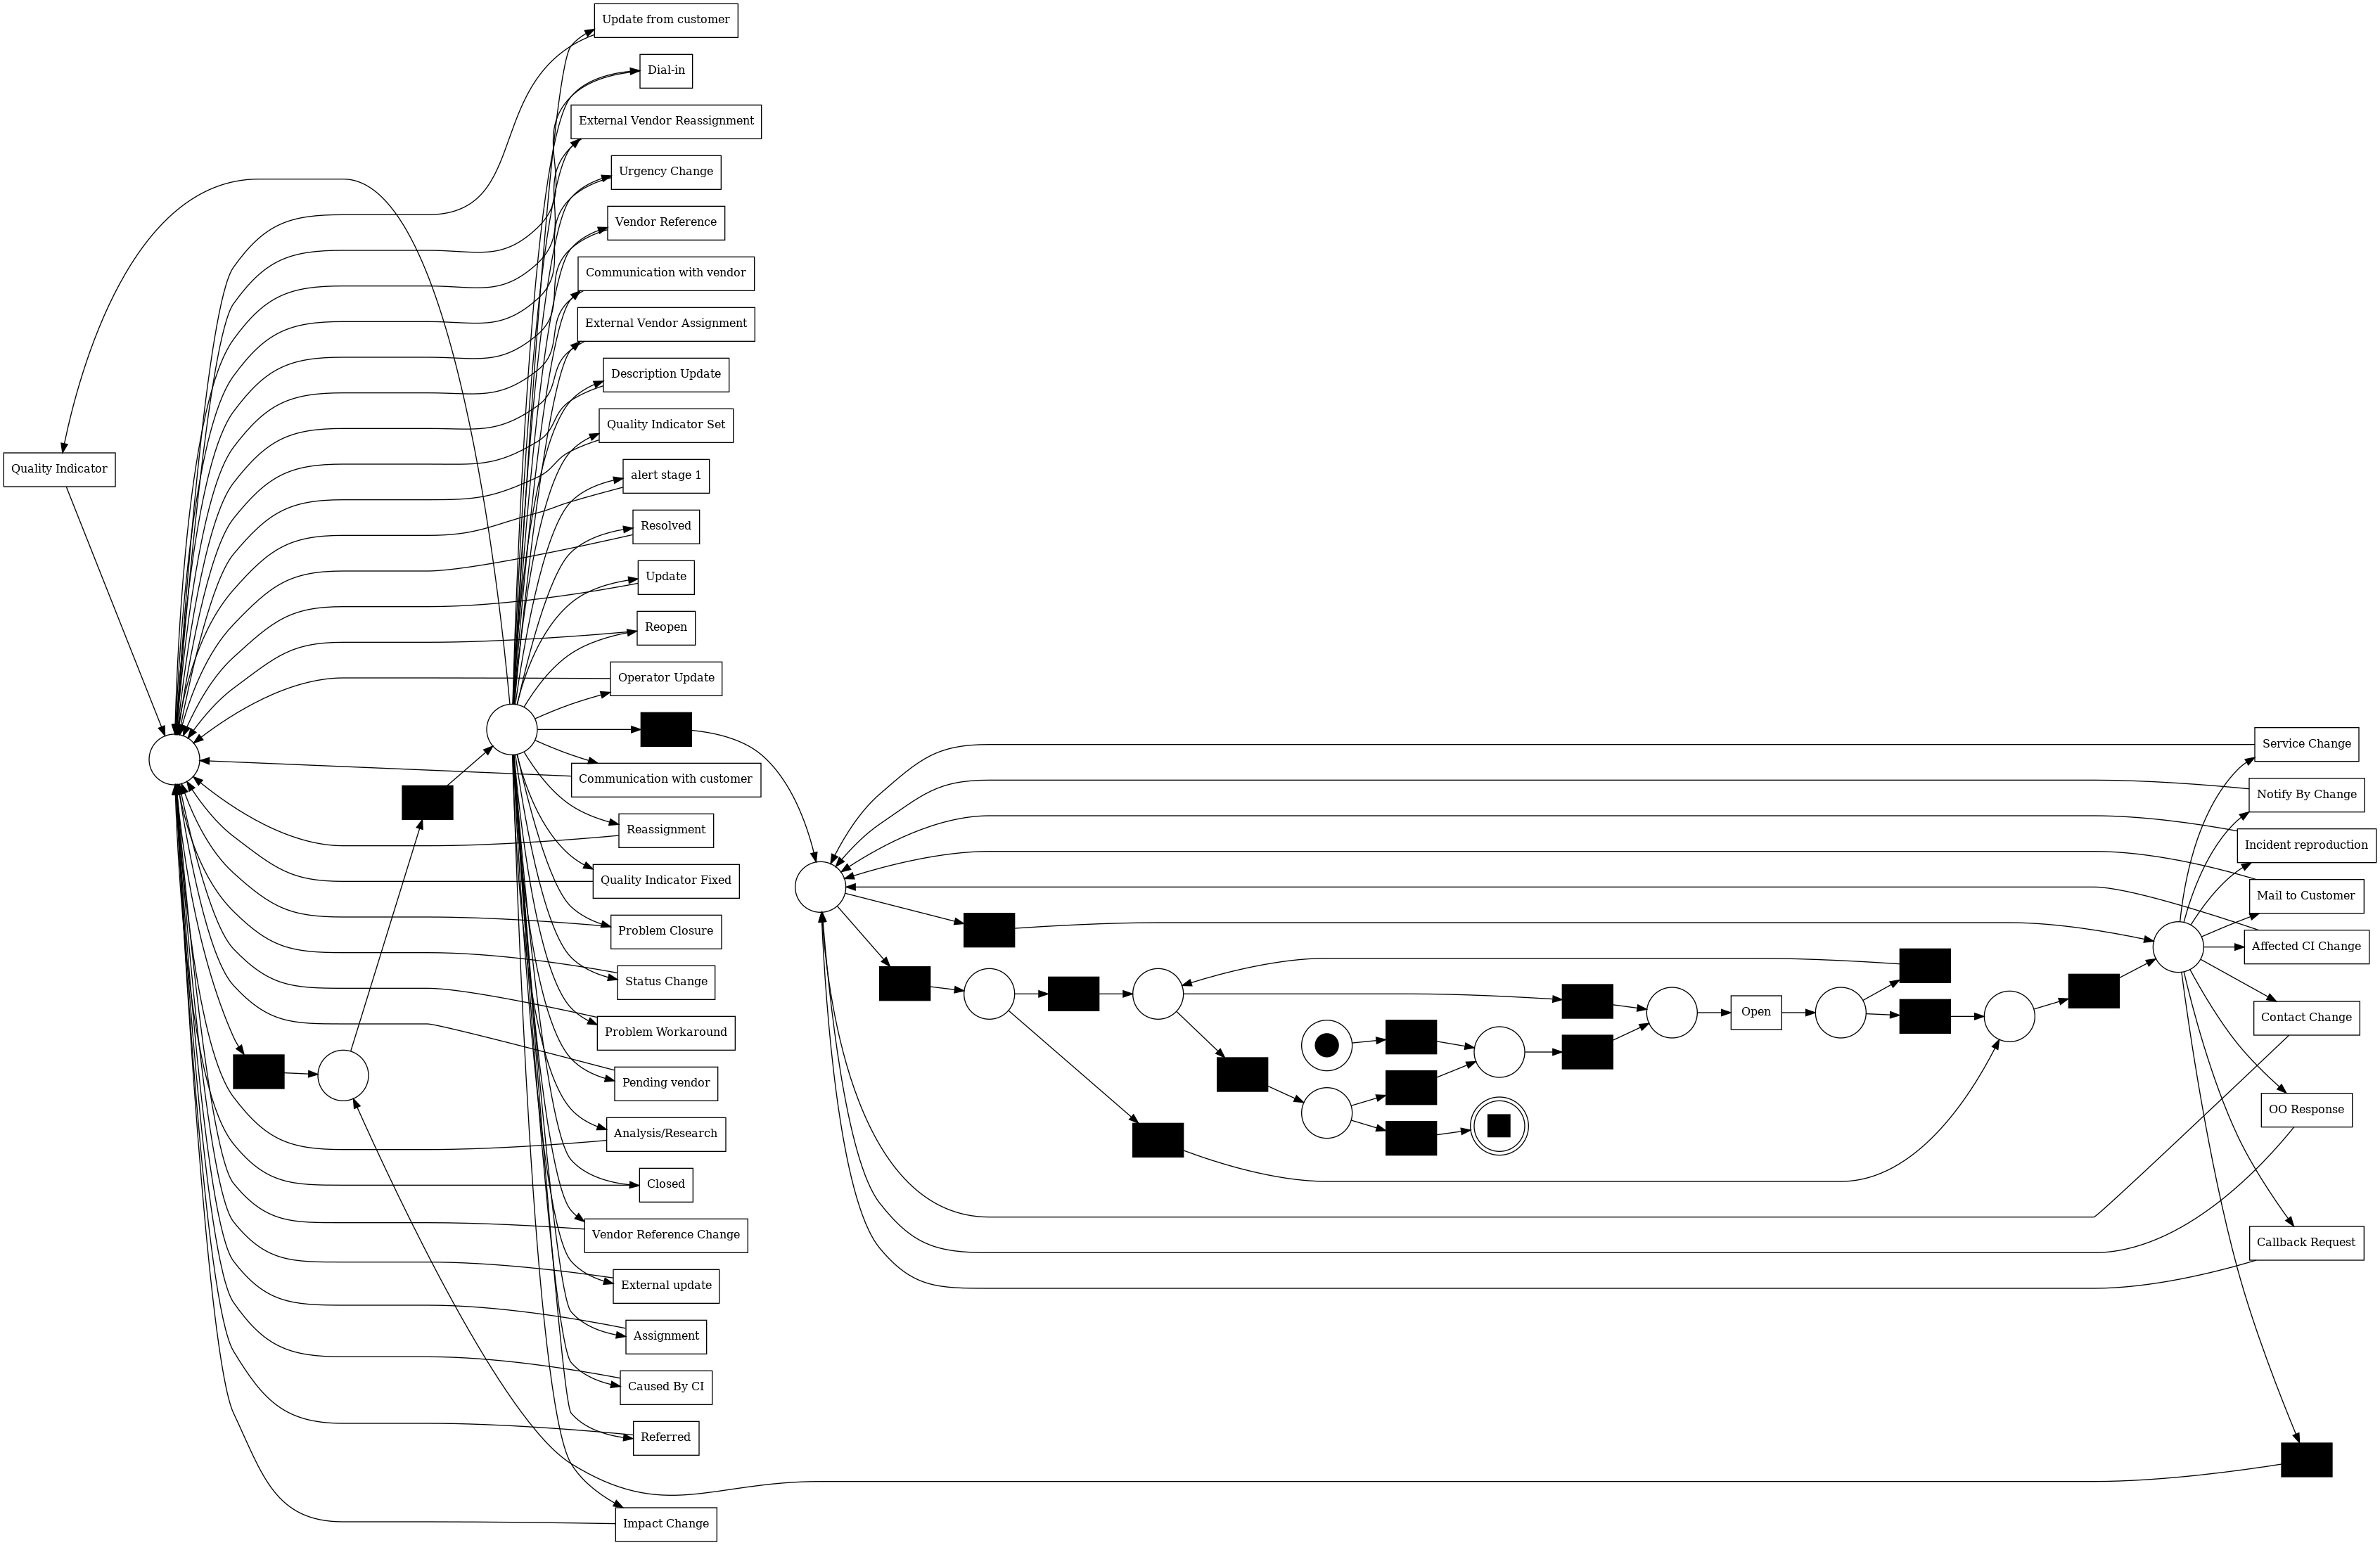

In [5]:
gviz = pn_visualizer.apply(petri_model, start_marking, end_marking)
pn_visualizer.view(gviz)

In [6]:
results = evaluator_algo.apply(event_log, petri_model, start_marking, end_marking)

replaying log with TBR, completed variants ::   0%|          | 0/20939 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/180021 [00:00<?, ?it/s]

In [7]:
results

{'fitness': {'perc_fit_traces': 100.0,
  'average_trace_fitness': 1.0,
  'log_fitness': 1.0,
  'percentage_of_fitting_traces': 100.0},
 'precision': 0.2642012930407297,
 'generalization': 0.9007480662527799,
 'simplicity': 0.45454545454545453,
 'metricsAverageWeight': 0.654873703459741,
 'fscore': 0.4179734580167333}